### Preprocessing data for the Identification Model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import FeatureHasher
from wordcloud import WordCloud

In [3]:
df = pd.read_csv("model_identification_data.csv", index_col = 0, sep = ",")

C:\Users\leone\AppData\Local\Temp\ipykernel_8244\1498123763.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("model_identification_data.csv", index_col = 0, sep = ",")


In [4]:
df.head()

,member_state,manufacturer_name_eu,vehicle_type,commercial_name,year,category_of_vehicle,fuel_type,fuel_mode,electric_energy_consumption
ID,,,,,,,,,
56003309,GR,TOYOTA,"XA5(EU,M)",TOYOTA RAV4,2021,M1,petrol,H,0.0
56003313,GR,TOYOTA,"XA5(EU,M)",TOYOTA RAV4,2021,M1,petrol,H,0.0
56003314,GR,TOYOTA,"XA5(EU,M)",TOYOTA RAV4,2021,M1,petrol,H,0.0
56003351,GR,TOYOTA,"XA5(EU,M)",TOYOTA RAV4,2021,M1,petrol,M,0.0
56003352,GR,TOYOTA,"XA5(EU,M)",TOYOTA RAV4,2021,M1,petrol,M,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23687102 entries, 56003309 to 140000058
Data columns (total 9 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   member_state                 object 
 1   manufacturer_name_eu         object 
 2   vehicle_type                 object 
 3   commercial_name              object 
 4   year                         int64  
 5   category_of_vehicle          object 
 6   fuel_type                    object 
 7   fuel_mode                    object 
 8   electric_energy_consumption  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.8+ GB


In [6]:
# Splitting data into target and data sets, all features are categorical

target = df["electric_energy_consumption"]
data = df.drop(["electric_energy_consumption"], axis = 1)

C:\Users\leone\AppData\Local\Temp\ipykernel_8244\2054502193.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df[col], palette = "viridis", order = df[col].value_counts().index)


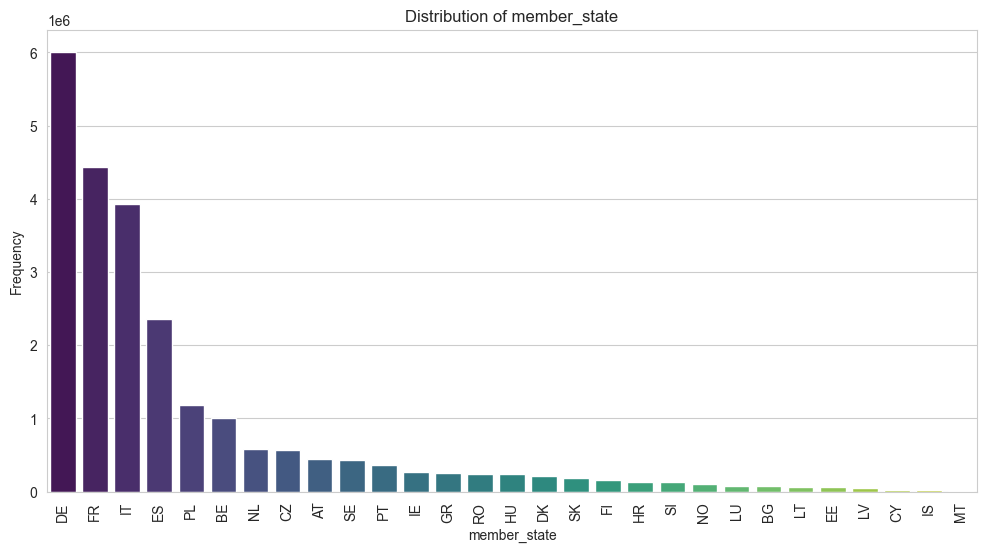

C:\Users\leone\AppData\Local\Temp\ipykernel_8244\2054502193.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_values.index, y = top_values.values, palette = "mako")


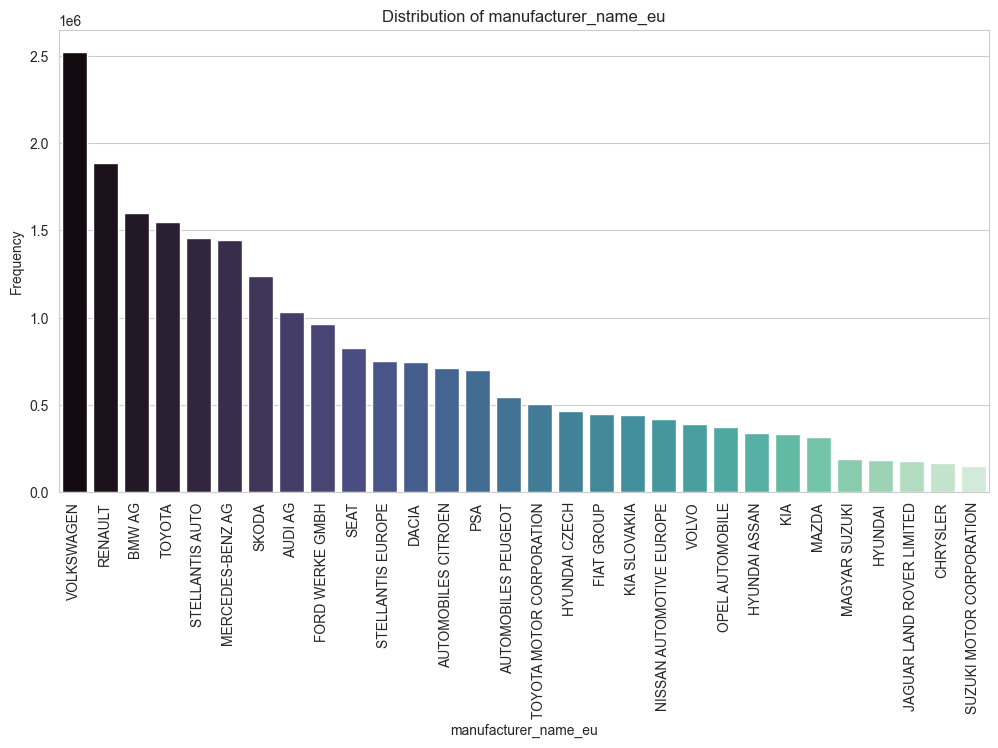

C:\Users\leone\AppData\Local\Temp\ipykernel_8244\2054502193.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_values.index, y = top_values.values, palette = "mako")


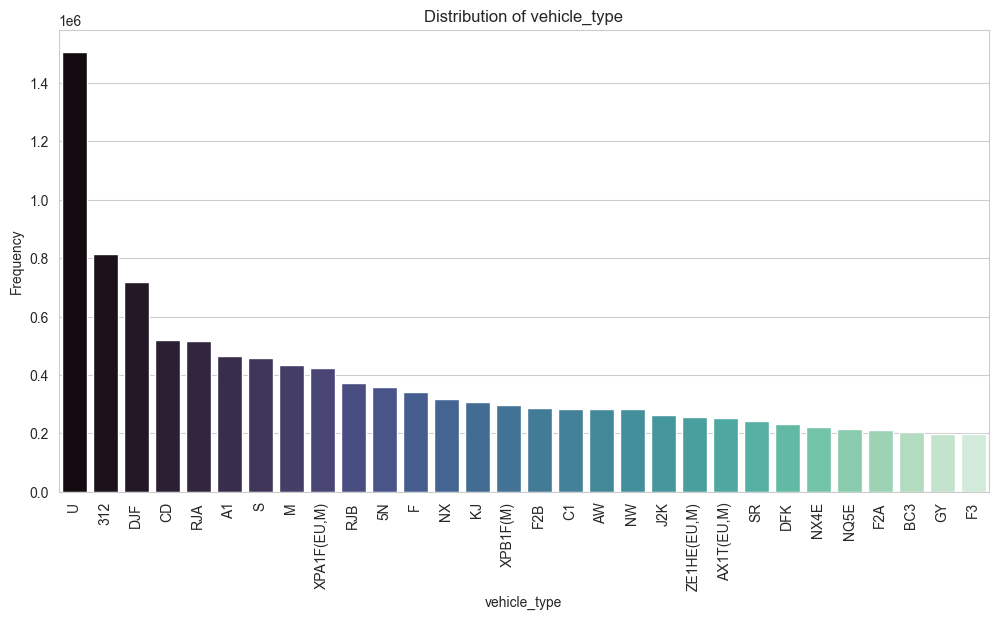

C:\Users\leone\AppData\Local\Temp\ipykernel_8244\2054502193.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df[col], palette = "viridis", order = df[col].value_counts().index)


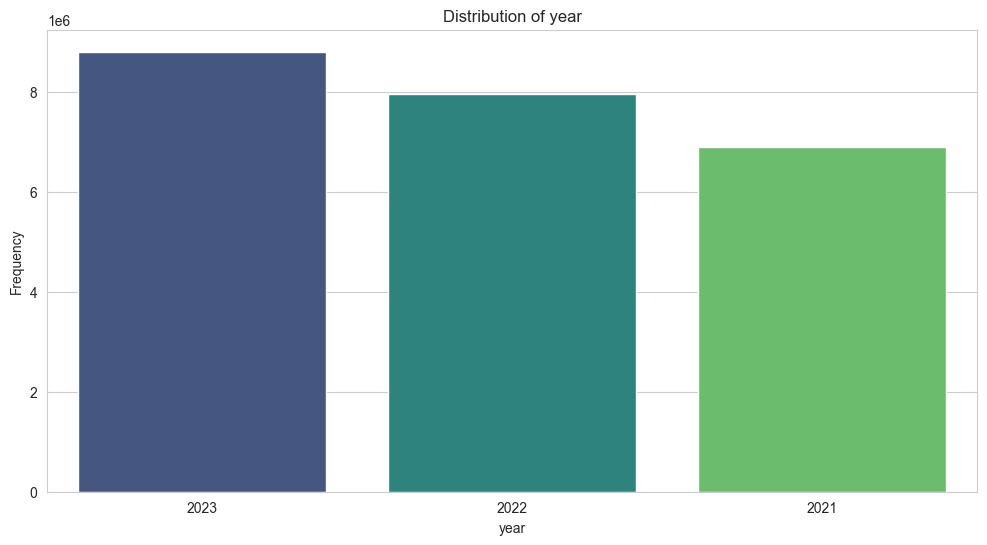

C:\Users\leone\AppData\Local\Temp\ipykernel_8244\2054502193.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df[col], palette = "viridis", order = df[col].value_counts().index)


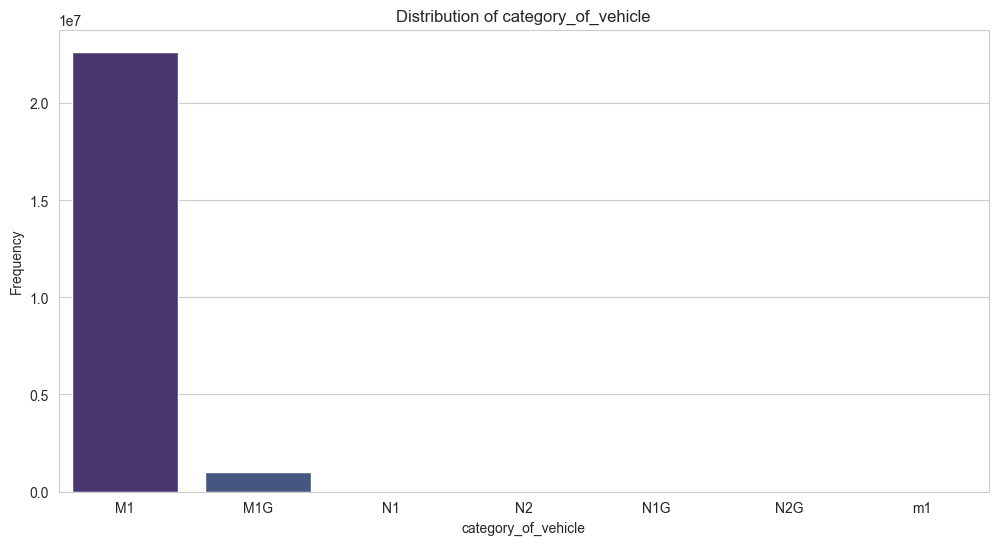

C:\Users\leone\AppData\Local\Temp\ipykernel_8244\2054502193.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df[col], palette = "viridis", order = df[col].value_counts().index)


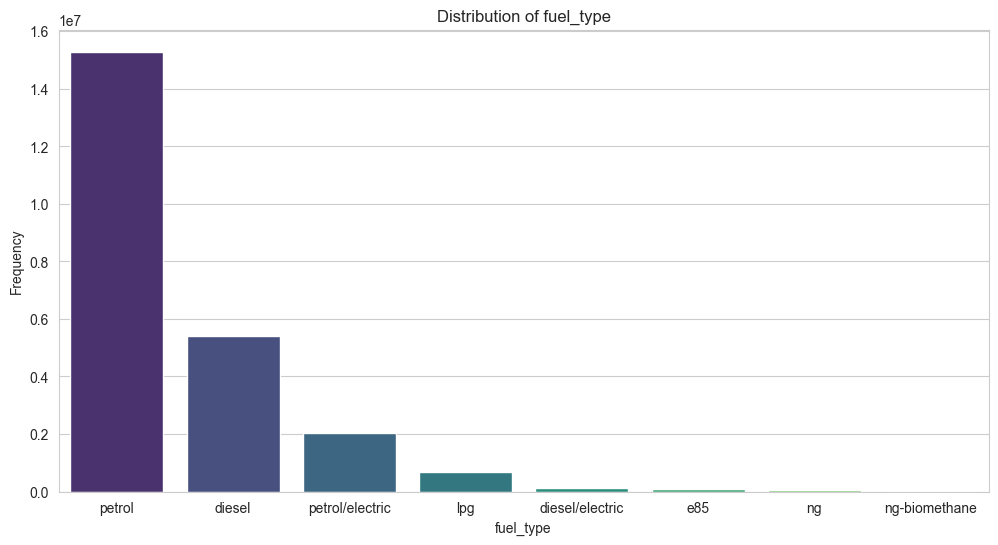

C:\Users\leone\AppData\Local\Temp\ipykernel_8244\2054502193.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df[col], palette = "viridis", order = df[col].value_counts().index)


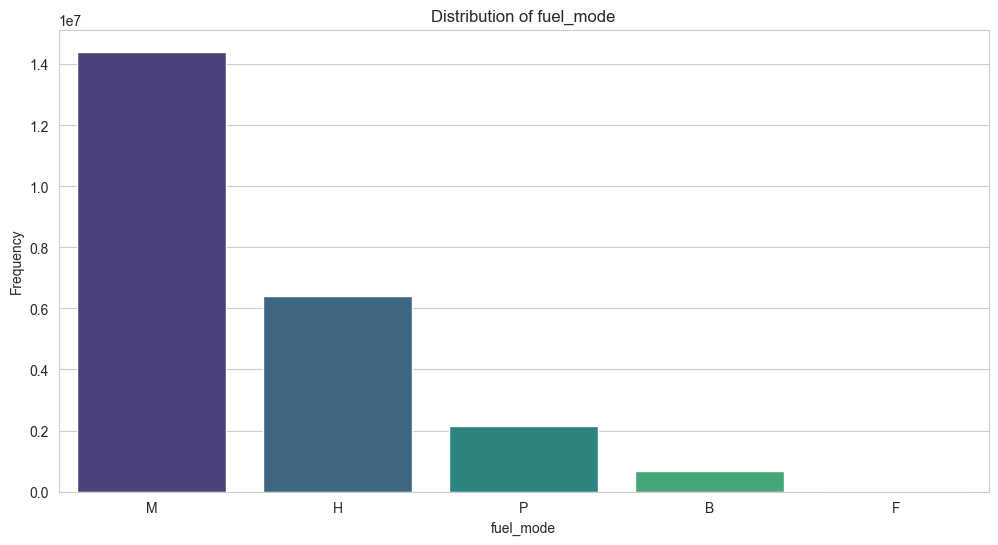

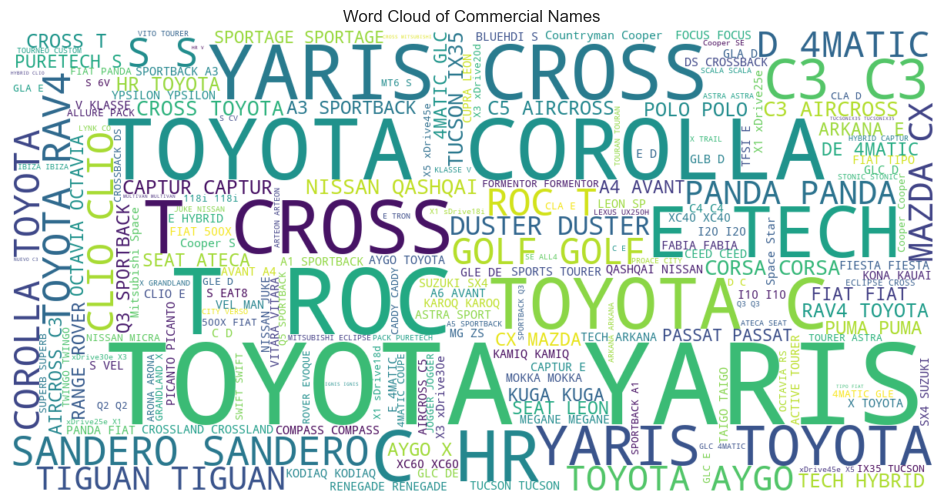

In [7]:
# graphs showing the distribution of the explanatory variables

# Set plot style
sns.set_style("whitegrid")

# Define the threshold for unique values where countplot is feasible
threshold_countplot = 30  # Maximum unique values for countplot

# Iterate through all columns
total_columns = data.columns
for col in total_columns:
    if col == "commercial_name":
        continue  # Skip plotting for 'commercial_name'
    
    unique_count = df[col].nunique()
    
    plt.figure(figsize=(12, 6))
    
    if unique_count <= threshold_countplot:
        sns.countplot(x = df[col], palette = "viridis", order = df[col].value_counts().index)
        plt.xticks(rotation=90 if unique_count > 10 else 0)
    
    else:
        top_values = df[col].value_counts().head(threshold_countplot)
        sns.barplot(x = top_values.index, y = top_values.values, palette = "mako")
        plt.xticks(rotation=90)
    
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")
    plt.show()

# Generate word cloud for commercial names
text = " ".join(df["commercial_name"].dropna().astype(str))

wordcloud = WordCloud(width = 1200, height = 600, background_color = "white").generate(text)

plt.figure(figsize = (12, 6))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.title("Word Cloud of Commercial Names")
plt.show()

In [8]:
# Identifying Rare Categories in Categorical Variables

# Threshold to classify a category as rare (< 0.1% of total data)
threshold = 0.001

# Dictionary to store rare categories per column
rare_categories = {}

# Identify categorical columns within the full dataset 'df'
categorical_cols = [col for col in df.columns if df[col].dtype == "object"]

# Check for rare categories
for col in categorical_cols:
    category_counts = df[col].value_counts(normalize = True, dropna = False)
    rare_values = category_counts[category_counts < threshold]

    if not rare_values.empty:  # Only store columns that have rare categories
        rare_categories[col] = rare_values.index.tolist()
        
        print(f"🔍 Rare categories for {col} (Total unique: {df[col].nunique()}, Rare: {len(rare_values)})")
        print(rare_values)  # Show rare categories
        print("\n")


🔍 Rare categories for member_state (Total unique: 29, Rare: 2)
member_state
IS    0.000973
MT    0.000522
Name: proportion, dtype: float64


🔍 Rare categories for manufacturer_name_eu (Total unique: 81, Rare: 38)
manufacturer_name_eu
MASERATI                   5.839043e-04
AA-IVA                     5.093067e-04
FERRARI                    4.324294e-04
ALPINE                     3.647555e-04
AUDI HUNGARIA              3.418316e-04
FORD MOTOR COMPANY         3.035407e-04
SSANGYONG                  1.873593e-04
BENTLEY                    1.242026e-04
DUPLICATE                  1.183344e-04
GENERAL MOTORS HOLDINGS    1.129729e-04
OUT OF SCOPE               9.591718e-05
ASTON MARTIN               8.337871e-05
MERCEDES AMG               6.429659e-05
INEOS                      4.990057e-05
ALPINA                     4.719868e-05
AA-NSS                     4.437014e-05
LAMBORGHINI                4.204820e-05
MAHINDRA                   3.913522e-05
ROLLS-ROYCE                2.579463e-05
RENAUL

In [9]:
# Evaluating the Relationship Between Categorical Variables and the Target Variable (Significance)

# ANOVA test for all categorical variables
for col in [col for col in df.columns if df[col].dtype == "object"]:
    unique_values = df[col].nunique()
    
    if unique_values < 2:
        print(f"Skipping {col}: Only one category present.")
        continue
    
    print(f"Running ANOVA for {col} (Unique values: {unique_values})")
    
    # Create groups based on unique values of the categorical variable
    groups = [df["electric_energy_consumption"][df[col] == cat] for cat in df[col].unique()]
    
    # Perform ANOVA test
    try:
        f_stat, p_value = stats.f_oneway(*groups)
    except ValueError:
        print(f"Skipping {col}: Insufficient data for ANOVA test.")
        continue
    
    # Display result
    print(f"{col}: ANOVA p-value = {p_value:.5f}")
    
    # Interpretation
    if p_value < 0.05:
        print(f"{col} has a **significant relationship** with `electric_energy_consumption` (p < 0.05).")
    else:
        print(f"{col} has **no significant relationship** with `electric_energy_consumption` (p >= 0.05) and might be removed.")
    
    print("\n")

Running ANOVA for member_state (Unique values: 29)
member_state: ANOVA p-value = 0.00000
member_state has a **significant relationship** with `electric_energy_consumption` (p < 0.05).


Running ANOVA for manufacturer_name_eu (Unique values: 81)
manufacturer_name_eu: ANOVA p-value = 0.00000
manufacturer_name_eu has a **significant relationship** with `electric_energy_consumption` (p < 0.05).


Running ANOVA for vehicle_type (Unique values: 738)
vehicle_type: ANOVA p-value = 0.00000
vehicle_type has a **significant relationship** with `electric_energy_consumption` (p < 0.05).


Running ANOVA for commercial_name (Unique values: 7785)
commercial_name: ANOVA p-value = 0.00000
commercial_name has a **significant relationship** with `electric_energy_consumption` (p < 0.05).


Running ANOVA for category_of_vehicle (Unique values: 7)
category_of_vehicle: ANOVA p-value = 0.00000
category_of_vehicle has a **significant relationship** with `electric_energy_consumption` (p < 0.05).


Running ANOVA 

In [ ]:
# dimension reduction

In [ ]:
# devo adicionar os gráficos de distribuicao das variáveis numericas após o encodamento?

In [ ]:
# apenas um exemplo, pois pode ser que alguma variável venha a usar o OnehotEncoder

# Encoding member_state, category_of_vehicle, fuel_type

# Define chunk size for processing large datasets
chunk_size = 1000000  # Process 1 million rows at a time

# Define categorical features to encode
categorical_features = ["member_state", "category_of_vehicle", "fuel_type"]

# Initialize One-Hot Encoder
encoder = OneHotEncoder(handle_unknown = "ignore", sparse_output = False)

# Load data in chunks and process each chunk separately
processed_chunks = []
for chunk in pd.read_csv("C:/Users/leone/Project/df_in_process.csv", chunksize = chunk_size):  # Replace with actual filename
    
    # Handling Rare Categories in `member_state`
    rare_states = ["IS", "MT"]
    chunk["member_state"] = chunk["member_state"].apply(lambda x: "Other" if x in rare_states else x)

    # Handling Rare Categories in `category_of_vehicle`
    rare_categories_vehicle = ["N1G", "N2G", "N1", "N2"]
    chunk["category_of_vehicle"] = chunk["category_of_vehicle"].apply(lambda x: "Other" if x in rare_categories_vehicle else x)

    # Handling Rare Categories in `fuel_type`
    rare_fuel_modes = ["NG-BIOMETHANE"]
    chunk["fuel_type"] = chunk["fuel_type"].apply(lambda x: "Other" if x in rare_fuel_modes else x)

    # Apply One-Hot Encoding
    encoded_features = encoder.fit_transform(chunk[categorical_features])
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

    # Convert data types to float32 for memory efficiency
    for col in encoded_df.columns:
        encoded_df[col] = encoded_df[col].astype(np.float32)

    # Merge encoded features back into original chunk and drop original categorical columns
    chunk = pd.concat([chunk, encoded_df], axis=1).drop(columns = categorical_features)

    # Store processed chunk
    processed_chunks.append(chunk)

# Concatenate all processed chunks into final dataframe
df = pd.concat(processed_chunks, axis=0)

# Free memory
del processed_chunks

# Display transformed dataset

print(df.head())

In [ ]:
# apenas um exemplo, pois pode ser que alguma variável venha a usar o OnehotEncoder

# Encoding manufacturer_name_eu

# Define the manufacturer mapping dictionary
manufacturer_map = {
    "TOYOTA": "Toyota", "TOYOTA MOTOR CORPORATION": "Toyota",
    "HYUNDAI": "Hyundai", "HYUNDAI ASSAN": "Hyundai", "HYUNDAI CZECH": "Hyundai",
    "FIAT GROUP": "Fiat", "ALFA ROMEO": "Alfa Romeo", "MASERATI": "Maserati",
    "AUTOMOBILES PEUGEOT": "Peugeot", "AUTOMOBILES CITROËN": "Citroën",
    "OPEL AUTOMOBILE": "Opel", "CHRYSLER": "Chrysler", "JEEP": "Jeep",
    "DODGE": "Dodge", "RAM": "Ram", "ABARTH": "Abarth", "DS AUTOMOBILES": "DS Automobiles",
    "VAUXHALL": "Vauxhall", "KIA": "Kia", "KIA SLOVAKIA": "Kia", "VOLVO": "Volvo",
    "MITSUBISHI MOTORS THAILAND": "Mitsubishi", "MITSUBISHI MOTORS CORPORATION": "Mitsubishi",
    "JAGUAR LAND ROVER LIMITED": "Jaguar Land Rover", "NISSAN AUTOMOTIVE EUROPE": "Nissan",
    "HONDA MOTOR CO": "Honda", "SKODA": "Škoda", "AUDI HUNGARIA": "Audi", "AUDI AG": "Audi",
    "SEAT": "Seat", "VOLKSWAGEN": "Volkswagen", "PORSCHE": "Porsche", "BENTLEY": "Bentley",
    "BUGATTI": "Bugatti", "LAMBORGHINI": "Lamborghini", "SCANIA": "Scania", "MAN": "MAN",
    "RENAULT": "Renault", "DACIA": "Dacia", "ALPINE": "Alpine", "FORD MOTOR COMPANY": "Ford",
    "FORD WERKE GMBH": "Ford", "FORD MOTOR AUSTRALIA": "Ford", "GENERAL MOTORS HOLDINGS": "General Motors",
    "MAZDA": "Mazda", "MAZDA EUROPE": "Mazda", "SUBARU": "Subaru", "MAGYAR SUZUKI": "Suzuki",
    "SUZUKI MOTOR CORPORATION": "Suzuki", "SUZUKI THAILAND": "Suzuki", "GEELY": "Geely",
    "FERRARI": "Ferrari", "BMW AG": "BMW", "BMW GMBH": "BMW", "MERCEDES-BENZ AG": "Mercedes-Benz",
    "MERCEDES AMG": "Mercedes-Benz", "LOTUS": "Lotus", "ROLLS ROYCE": "Rolls-Royce",
    "ROLLS-ROYCE": "Rolls-Royce", "MCLAREN": "McLaren", "SSANGYONG": "SsangYong",
    "ASTON MARTIN": "Aston Martin", "MAHINDRA": "Mahindra", "DFSK": "Dongfeng",
    "DONGFENG LIUZHOU": "Dongfeng"
}

# Define rare categories based on frequency analysis
rare_manufacturers = [
    "Maserati", "AA-IVA", "Ferrari", "Alpine", "SsangYong", "Bentley", "DUPLICATE", 
    "General Motors", "OUT OF SCOPE", "Aston Martin", "INEOS", "ALPINA", "AA-NSS", 
    "Lamborghini", "Mahindra", "Rolls-Royce", "RENAULT TRUCKS", "Dongfeng", 
    "CATERHAM", "MORGAN", "McLaren", "SECMA", "Lotus", "GREAT WALL MOTOR", 
    "UNKNOWN", "Bugatti", "KTM", "DALLARA", "DONKERVOORT", "CNG TECHNIK", 
    "BRILLIANCE SHINERAY", "IVECO", "LEVC"
]

# Hashing configuration
num_hash_features = 16
hasher = FeatureHasher(n_features=num_hash_features, input_type="string")

# Chunk processing
chunk_size = 10000  # Define a reasonable chunk size
df_chunks = []  # List to store processed chunks

# Process dataset in chunks
for chunk in pd.read_csv("C:/Users/leone/Project/df_in_process.csv", chunksize=chunk_size):
    # Replace rare categories with "Other"
    chunk["manufacturer_name_eu"] = chunk["manufacturer_name_eu"].apply(
        lambda x: "Other" if x in rare_manufacturers else x
    )

    # Apply Manufacturer Dictionary for Standardization
    chunk["manufacturer_name_eu"] = chunk["manufacturer_name_eu"].replace(manufacturer_map)

    # Ensure "Other" remains labeled correctly
    chunk["manufacturer_name_eu"] = chunk["manufacturer_name_eu"].apply(
        lambda x: x if x in manufacturer_map.values() else "Other"
    )

    # Apply Hash Encoding
    hashed_features = hasher.transform(chunk["manufacturer_name_eu"].astype(str).values.reshape(-1, 1))

    # Convert hashed features into a DataFrame
    hashed_df = pd.DataFrame(hashed_features.toarray())

    # Rename columns for clarity
    hashed_df.columns = [f"manufacturer_hash_{i}" for i in range(num_hash_features)]

    # Merge hashed features back into the chunk and drop the original column
    chunk = pd.concat([chunk, hashed_df], axis=1).drop(columns=["manufacturer_name_eu"])

    # Append processed chunk to list
    df_chunks.append(chunk)

# Concatenate all chunks into a final DataFrame
df_final = pd.concat(df_chunks, ignore_index=True)

# Display transformed dataset
print(df_final.head())

In [ ]:
# apenas um exemplo, pois pode ser que alguma variável venha a usar o OnehotEncoder


# Ecoding vehicle_type

# Define the threshold for rare categories
threshold = 0.001  # 0.1% frequency

# Identify rare vehicle types
vehicle_type_counts = df["vehicle_type"].value_counts(normalize = True)
rare_vehicle_types = vehicle_type_counts[vehicle_type_counts < threshold].index.tolist()

# Replace rare categories with "Other"
df["vehicle_type"] = df["vehicle_type"].apply(lambda x: "Other" if x in rare_vehicle_types else x)

# Apply Hash Encoding
num_hash_features = 32 
hasher = FeatureHasher(n_features=num_hash_features, input_type = "string")
hashed_features = hasher.transform(df["vehicle_type"].astype(str))

# Convert hashed features into a DataFrame
hashed_df = pd.DataFrame(hashed_features.toarray())

# Rename columns for clarity
hashed_df.columns = [f"vehicle_type_hash_{i}" for i in range(num_hash_features)]

# Merge hashed features back into the original dataset and drop the original column
df = pd.concat([df, hashed_df], axis=1).drop(columns = ["vehicle_type"])

# Display the transformed dataset
print(df.head())

In [ ]:
# apenas um exemplo, pois pode ser que alguma variável venha a usar o OnehotEncoder


# Encoding commercial_name

# Define number of hash features
num_hash_features = 32 

# Apply Hash Encoding
hasher = FeatureHasher(n_features=num_hash_features, input_type="string")
hashed_features = hasher.transform(df["commercial_name"].astype(str))

# Convert hashed features into a DataFrame
hashed_df = pd.DataFrame(hashed_features.toarray())

# Rename columns for clarity
hashed_df.columns = [f"commercial_name_hash_{i}" for i in range(num_hash_features)]

# Merge hashed features back into the original dataset and drop the original column
df = pd.concat([df, hashed_df], axis=1).drop(columns=["commercial_name"])

# Display the transformed dataset
print(df.head())


In [ ]:
# apenas um exemplo, pois pode ser que alguma variável venha a usar o OnehotEncoder

#  correlation between fuel mode and fuel type
# on why handle fuel mode in this way ("Description of Categorical Variable.txt")

# Function to calculate Cramér's V correlation between two categorical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Apply the function to `fuel_type` and `fuel_mode`
cramers_v_value = cramers_v(df["fuel_type"], df["fuel_mode"])

print(f"Correlation between `fuel_type` and `fuel_mode` (Cramér's V): {cramers_v_value:.4f}")

# Given the uncertainty regarding the meaning of the fuel_mode values and its high correlation
#  with the variable fuel_type it will be removed from the model.

In [ ]:
# Removing fuel_mode

df.drop(columns = ["fuel_mode"], inplace = True)

In [ ]:
# apenas um exemplo, pois pode ser que alguma variável venha a usar o OnehotEncoder

# Encoding innovative_technologies

# Define threshold for rare categories
threshold = 0.001  # Categories occurring in less than 0.1% of the data

# Identify rare categories
tech_counts = df["innovative_technologies"].value_counts(normalize = True)
rare_techs = tech_counts[tech_counts < threshold].index.tolist()

# Replace rare categories with "Other"
df["innovative_technologies"] = df["innovative_technologies"].apply(lambda x: "Other" if x in rare_techs else x)

# Define number of hash features (optimized for efficiency)
num_hash_features = 32 

# Apply Hash Encoding
hasher = FeatureHasher(n_features = num_hash_features, input_type = "string")
hashed_features = hasher.transform(df["innovative_technologies"].astype(str))

# Convert hashed features into a DataFrame
hashed_df = pd.DataFrame(hashed_features.toarray())

# Rename columns for clarity
hashed_df.columns = [f"innovative_tech_hash_{i}" for i in range(num_hash_features)]

# Merge hashed features back into the original dataset and drop the original column
df = pd.concat([df, hashed_df], axis = 1).drop(columns = ["innovative_technologies"])

# Display transformed dataset
print(df.head())
